# 5장 대한민국 인구 소멸 위기 지역 분석

우리나라의 인구 소멸 위기지역에 대해 조사하고 분석하여 시각화를 통해 현황 파악.

- 문제정의 : 65세 이상 노인 인구와 20~39세 여성 인구를 비교하여 젊은 여성인구가 노인 인구의 절반에 미달할 경우 인구 소멸 위험 지역으로 분류





In [1]:
# # 나눔 글꼴 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
#seaborn 스타일 설정
sns.set_style("whitegrid")

# 플롯 스타일 설정
plt.style.use('fivethirtyeight')

# matplotlib을 사용하는 모든 plot에 나눔 글꼴 적용
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

## 1) 인구 데이터 확보

- 국가통계포털에서 데이터 추출

https://kosis.kr/index/index.do

In [3]:
import pandas as pd
import numpy as np

In [4]:
# 데이터 로드
pop = pd.read_excel('/content/drive/MyDrive/스터디/데이터 주무르기/data/05_pop_2020.xlsx', header=2)

print(pop.info())
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   행정구역별(시군구)(1)  18 non-null     object
 1   행정구역별(시군구)(2)  321 non-null    object
 2   성별(1)          963 non-null    object
 3   합계             963 non-null    int64 
 4   20~24세         963 non-null    int64 
 5   25~29세         963 non-null    int64 
 6   30~34세         963 non-null    int64 
 7   35~39세         963 non-null    int64 
 8   40~44세         963 non-null    int64 
 9   45~49세         963 non-null    int64 
 10  50~54세         963 non-null    int64 
 11  55~59세         963 non-null    int64 
 12  60~64세         963 non-null    int64 
 13  65~69세         963 non-null    int64 
 14  70~74세         963 non-null    int64 
 15  75~79세         963 non-null    int64 
 16  80~84세         963 non-null    int64 
 17  85세이상          963 non-null    int64 
dtypes: int64(15), object(3)
memory

,행정구역별(시군구)(1),행정구역별(시군구)(2),성별(1),합계,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,전국,소계,계,49028727,2790465,3380057,3042091,3603275,3753646,4180070,4223008,4064377,3764489,2660010,1980075,1540870,1032047,645773
1,NaN,NaN,남자,24202134,1314905,1764662,1567009,1833161,1896599,2105204,2106684,2025737,1845468,1274792,923593,663226,396905,196983
2,NaN,NaN,여자,24826593,1475560,1615395,1475082,1770114,1857047,2074866,2116324,2038640,1919021,1385218,1056482,877644,635142,448790
3,서울특별시,소계,계,9098805,559561,789005,695517,714489,683461,753274,737453,704111,679187,502367,383572,283881,171305,104198
4,NaN,NaN,남자,4376850,235688,383994,346143,358387,338092,370999,358445,339001,319781,234484,176111,128243,71226,34158


In [5]:
# 데이터 결측치 위의 값으로 대치
pop.fillna(method='pad', inplace=True)

pop.head()

,행정구역별(시군구)(1),행정구역별(시군구)(2),성별(1),합계,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,전국,소계,계,49028727,2790465,3380057,3042091,3603275,3753646,4180070,4223008,4064377,3764489,2660010,1980075,1540870,1032047,645773
1,전국,소계,남자,24202134,1314905,1764662,1567009,1833161,1896599,2105204,2106684,2025737,1845468,1274792,923593,663226,396905,196983
2,전국,소계,여자,24826593,1475560,1615395,1475082,1770114,1857047,2074866,2116324,2038640,1919021,1385218,1056482,877644,635142,448790
3,서울특별시,소계,계,9098805,559561,789005,695517,714489,683461,753274,737453,704111,679187,502367,383572,283881,171305,104198
4,서울특별시,소계,남자,4376850,235688,383994,346143,358387,338092,370999,358445,339001,319781,234484,176111,128243,71226,34158


In [6]:
# 데이터 프레임 열이름 변경
pop.rename(columns = {'행정구역별(시군구)(1)':'광역시도', 
                             '행정구역별(시군구)(2)':'시도',
                            '성별(1)' : '성별', 
                             '합계':'인구수'}, inplace=True)
pop.head()



,광역시도,시도,성별,인구수,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,전국,소계,계,49028727,2790465,3380057,3042091,3603275,3753646,4180070,4223008,4064377,3764489,2660010,1980075,1540870,1032047,645773
1,전국,소계,남자,24202134,1314905,1764662,1567009,1833161,1896599,2105204,2106684,2025737,1845468,1274792,923593,663226,396905,196983
2,전국,소계,여자,24826593,1475560,1615395,1475082,1770114,1857047,2074866,2116324,2038640,1919021,1385218,1056482,877644,635142,448790
3,서울특별시,소계,계,9098805,559561,789005,695517,714489,683461,753274,737453,704111,679187,502367,383572,283881,171305,104198
4,서울특별시,소계,남자,4376850,235688,383994,346143,358387,338092,370999,358445,339001,319781,234484,176111,128243,71226,34158


In [7]:
# 구별 데이터가 존재하는 데이터들만 추출
pop = pop[(pop['시도'] != '소계')]

pop

,광역시도,시도,성별,인구수,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
6,서울특별시,종로구,계,135582,9818,11989,9412,9152,9046,11157,11700,11495,10384,7581,5986,5209,3467,2225
7,서울특별시,종로구,남자,65104,4085,6176,4734,4567,4363,5457,5622,5729,5097,3664,2686,2231,1442,823
8,서울특별시,종로구,여자,70478,5733,5813,4678,4585,4683,5700,6078,5766,5287,3917,3300,2978,2025,1402
9,서울특별시,중구,계,115067,7506,10367,9685,9431,7968,8480,9367,9511,9132,6667,5279,4247,2713,1734
10,서울특별시,중구,남자,55343,3072,5069,4760,4754,4135,4212,4610,4677,4478,3187,2415,1855,1072,552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,제주특별자치도,제주시,남자,230998,11839,15582,13278,17549,18833,21520,20970,18334,15566,10182,7533,5494,3348,1731
959,제주특별자치도,제주시,여자,234309,12988,14630,13130,17620,18365,21059,19918,17763,15624,10843,8670,7083,5644,4964
960,제주특별자치도,서귀포시,계,167238,6817,8533,7891,11195,12725,14900,14838,14299,13503,9624,8120,6630,4779,3458
961,제주특별자치도,서귀포시,남자,83506,3326,4417,3946,5559,6526,8094,7904,7422,6794,4653,3829,2875,1797,896


In [8]:
# 이후 데이터 처리에서 copy 관련 warning을 피하기 위해 .copy()옵션으로 재지정함 => 본 분석에서는 진행하지 않음
# pop.is_copy = False

## 2) 인구 소멸 위기 지역 계산하고 데이터 정리

In [9]:
# 인구수 파생 변수 생성
pop['20-39세'] = pop['20~24세'] + pop['25~29세'] + \
                        pop['30~34세'] + pop['35~39세']
    
pop['65세이상'] = pop['65~69세'] + pop['70~74세'] + \
                        pop['75~79세'] + pop['80~84세'] + \
                        pop['85세이상']
            
pop.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,광역시도,시도,성별,인구수,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20-39세,65세이상
6,서울특별시,종로구,계,135582,9818,11989,9412,9152,9046,11157,11700,11495,10384,7581,5986,5209,3467,2225,40371,24468
7,서울특별시,종로구,남자,65104,4085,6176,4734,4567,4363,5457,5622,5729,5097,3664,2686,2231,1442,823,19562,10846
8,서울특별시,종로구,여자,70478,5733,5813,4678,4585,4683,5700,6078,5766,5287,3917,3300,2978,2025,1402,20809,13622
9,서울특별시,중구,계,115067,7506,10367,9685,9431,7968,8480,9367,9511,9132,6667,5279,4247,2713,1734,36989,20640
10,서울특별시,중구,남자,55343,3072,5069,4760,4754,4135,4212,4610,4677,4478,3187,2415,1855,1072,552,17655,9081
11,서울특별시,중구,여자,59724,4434,5298,4925,4677,3833,4268,4757,4834,4654,3480,2864,2392,1641,1182,19334,11559
12,서울특별시,용산구,계,207039,12091,18105,17862,17737,15410,16897,17094,16254,15143,10637,8353,6836,4811,3210,65795,33847
13,서울특별시,용산구,남자,98396,4611,8528,8870,8889,7605,8273,8329,7981,7303,4989,3721,2902,1861,1086,30898,14559
14,서울특별시,용산구,여자,108643,7480,9577,8992,8848,7805,8624,8765,8273,7840,5648,4632,3934,2950,2124,34897,19288
15,서울특별시,성동구,계,277120,18054,24338,22897,24230,20603,21597,22450,22014,20417,14169,10878,8602,5311,3041,89519,42001


In [10]:
# pivot 활용하여 데이터 재정의

pop = pd.pivot_table(pop, 
                     index = ['광역시도', '시도'], 
                     columns = ['성별'],
                     values = ['인구수', '20-39세', '65세이상'])
pop

20-39세                   65세이상                   인구수                
성별             계      남자      여자       계     남자     여자       계      남자      여자
광역시도 시도                                                                       
강원도  강릉시   47748   25970   21778   42683  18371  24312  207831  103602  104229
     고성군    4214    2504    1710    7344   3113   4231   24044   12224   11820
     동부   211563  110155  101408  149585  64520  85065  881370  434988  446382
     동해시   16287    8892    7395   17100   7549   9551   84776   42703   42073
     면부    60526   33604   26922   92289  41770  50519  332015  169496  162519
...          ...     ...     ...     ...    ...    ...     ...     ...     ...
충청북도 진천군   19669   10794    8875   12711   5487   7224   79001   40982   38019
     청원구   55659   29751   25908   23045   9980  13065  187209   95228   91981
     청주시  229072  119444  109628  105958  46257  59701  813331  405904  407427
     충주시   47626   26094   21532   38919  16868  22051  202691  102019  100672
     흥덕구   78147   40404   37743   27889  12340  15549  255137  127650  127487

[303 rows x 9 columns]

In [11]:
# 소멸 비율이라는 컬럼 생성
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','계'] / 2)
pop.head()

20-39세                   65세이상  ...     인구수                      소멸비율
성별             계      남자      여자       계  ...       계      남자      여자          
광역시도 시도                                   ...                                  
강원도  강릉시   47748   25970   21778   42683  ...  207831  103602  104229  1.020453
     고성군    4214    2504    1710    7344  ...   24044   12224   11820  0.465686
     동부   211563  110155  101408  149585  ...  881370  434988  446382  1.355858
     동해시   16287    8892    7395   17100  ...   84776   42703   42073  0.864912
     면부    60526   33604   26922   92289  ...  332015  169496  162519  0.583428

[5 rows x 10 columns]

In [12]:
# 소멸위기지역 열에 true / False 값을 생성
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                   65세이상  ...     인구수              소멸비율 소멸위기지역
성별             계      남자      여자       계  ...      남자      여자                 
광역시도 시도                                   ...                                 
강원도  강릉시   47748   25970   21778   42683  ...  103602  104229  1.020453  False
     고성군    4214    2504    1710    7344  ...   12224   11820  0.465686   True
     동부   211563  110155  101408  149585  ...  434988  446382  1.355858  False
     동해시   16287    8892    7395   17100  ...   42703   42073  0.864912   True
     면부    60526   33604   26922   92289  ...  169496  162519  0.583428   True

[5 rows x 11 columns]

In [13]:
# 소멸위기 지역 리스트로 정리
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '동해시', '면부', '삼척시', '속초시', '양구군', '양양군', '영월군', '읍부', '인제군',
       ...
       '태안군', '홍성군', '괴산군', '단양군', '면부', '보은군', '영동군', '옥천군', '음성군', '제천시'],
      dtype='object', name='시도', length=122)

In [14]:
pop.head()

20-39세                   65세이상  ...     인구수              소멸비율 소멸위기지역
성별             계      남자      여자       계  ...      남자      여자                 
광역시도 시도                                   ...                                 
강원도  강릉시   47748   25970   21778   42683  ...  103602  104229  1.020453  False
     고성군    4214    2504    1710    7344  ...   12224   11820  0.465686   True
     동부   211563  110155  101408  149585  ...  434988  446382  1.355858  False
     동해시   16287    8892    7395   17100  ...   42703   42073  0.864912   True
     면부    60526   33604   26922   92289  ...  169496  162519  0.583428   True

[5 rows x 11 columns]

In [15]:
pop.reset_index(inplace=True) 
pop.head()

광역시도   시도  20-39세                  ...     인구수                      소멸비율 소멸위기지역
성별                 계      남자      여자  ...       계      남자      여자                 
0   강원도  강릉시   47748   25970   21778  ...  207831  103602  104229  1.020453  False
1   강원도  고성군    4214    2504    1710  ...   24044   12224   11820  0.465686   True
2   강원도   동부  211563  110155  101408  ...  881370  434988  446382  1.355858  False
3   강원도  동해시   16287    8892    7395  ...   84776   42703   42073  0.864912   True
4   강원도   면부   60526   33604   26922  ...  332015  169496  162519  0.583428   True

[5 rows x 13 columns]

In [16]:
# 컬럼 해제위해 두 컬럼 제목 합치기
tmp_coloumns = [pop.columns.get_level_values(0)[n] + \
                pop.columns.get_level_values(1)[n] 
                for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns

pop.head()

,광역시도,시도,20-39세계,20-39세남자,20-39세여자,65세이상계,65세이상남자,65세이상여자,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역
0,강원도,강릉시,47748,25970,21778,42683,18371,24312,207831,103602,104229,1.020453,False
1,강원도,고성군,4214,2504,1710,7344,3113,4231,24044,12224,11820,0.465686,True
2,강원도,동부,211563,110155,101408,149585,64520,85065,881370,434988,446382,1.355858,False
3,강원도,동해시,16287,8892,7395,17100,7549,9551,84776,42703,42073,0.864912,True
4,강원도,면부,60526,33604,26922,92289,41770,50519,332015,169496,162519,0.583428,True


In [17]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      303 non-null    object 
 1   시도        303 non-null    object 
 2   20-39세계   303 non-null    int64  
 3   20-39세남자  303 non-null    int64  
 4   20-39세여자  303 non-null    int64  
 5   65세이상계    303 non-null    int64  
 6   65세이상남자   303 non-null    int64  
 7   65세이상여자   303 non-null    int64  
 8   인구수계      303 non-null    int64  
 9   인구수남자     303 non-null    int64  
 10  인구수여자     303 non-null    int64  
 11  소멸비율      303 non-null    float64
 12  소멸위기지역    303 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 28.8+ KB


## 3) 지도 시각화를 위해 지역별 고유 ID 만들기

In [18]:
pop['시도'].unique()

array(['강릉시', '고성군', '동부', '동해시', '면부', '삼척시', '속초시', '양구군', '양양군', '영월군',
       '원주시', '읍부', '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군',
       '화천군', '횡성군', '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시',
       '권선구', '기흥구', '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구',
       '부천시', '분당구', '상록구', '성남시', '수원시', '수정구', '수지구', '시흥시', '안산시',
       '안성시', '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '용인시',
       '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구', '파주시',
       '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군',
       '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군', '의창구',
       '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군',
       '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시', '봉화군', '북구',
       '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군', '울릉군',
       '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구', '동구', '서구', '달서구',
       '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구'

In [19]:
# 딕셔너리 생성
si_name = [None] * len(pop)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [20]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [21]:
si_name

['강릉',
 '고성(강원)',
 '동',
 '동해',
 '면',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '읍',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '동',
 '안양 동안',
 '안양 만안',
 '면',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '용인',
 '읍',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '동',
 '창원 합포',
 '창원 회원',
 '면',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '읍',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '동',
 '면',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '읍',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 

In [22]:
# 지도 시각화에 사용하기 위해 위 과정에서 만들어진 행정구역의 고유한 이름을 ID로 지정한다
pop['ID'] = si_name

In [23]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID
0,강원도,강릉시,47748,21778,42683,207831,103602,104229,1.020453,False,강릉
1,강원도,고성군,4214,1710,7344,24044,12224,11820,0.465686,True,고성(강원)
2,강원도,동부,211563,101408,149585,881370,434988,446382,1.355858,False,동
3,강원도,동해시,16287,7395,17100,84776,42703,42073,0.864912,True,동해
4,강원도,면부,60526,26922,92289,332015,169496,162519,0.583428,True,면


## 4) Cartogram으로 우리나라 지도 만들기

In [24]:
draw_korea_raw = pd.read_excel('/content/drive/MyDrive/스터디/데이터 주무르기/data/05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [25]:
# 이제 각 행정 구역의 화면상 좌표를 얻기 위해 pivot_table의 반대 개념으로 .stack() 명령을 사용한다

draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [26]:
draw_korea = draw_korea_raw_stacked

In [27]:
# ID 컬럼에서 지도에 표기할때 시 이름 구 이름으로 줄을 나누기 위해 분리한다

BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

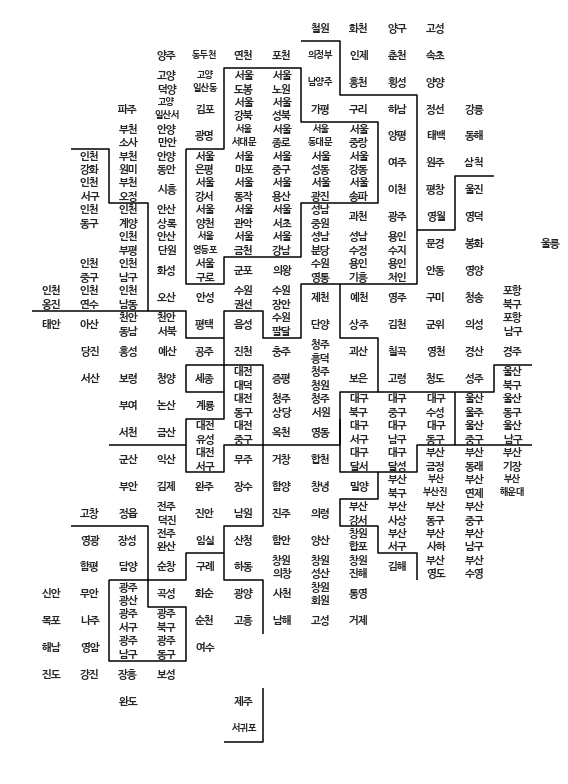

In [28]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미', '인천 남구'}

In [30]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양',
 '대구 동부',
 '대구 면부',
 '대구 읍부',
 '동',
 '면',
 '부산 동부',
 '부산 면부',
 '부산 읍부',
 '부천',
 '성남',
 '수원',
 '안산',
 '안양',
 '용인',
 '울산 동부',
 '울산 면부',
 '울산 읍부',
 '읍',
 '인천 동부',
 '인천 면부',
 '인천 미추홀',
 '인천 읍부',
 '전주',
 '창원',
 '천안',
 '청주',
 '포항'}

In [31]:
# 지도에 표시가 어려우니 제거
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


In [32]:
# 지도에 표시가 어려우니 제거
tmp_list = list(set(draw_korea['ID'].unique()) - set(pop['ID'].unique()))

for tmp in tmp_list:
    draw_korea = draw_korea.drop(draw_korea[draw_korea['ID']==tmp].index)
                       
print(set(draw_korea['ID'].unique()) - set(pop['ID'].unique()))

set()


In [33]:
# ID를 key로 두 데이터를 병합
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,47748,21778,42683,207831,103602,104229,1.020453,False,강릉,3,11
1,강원도,고성군,4214,1710,7344,24044,12224,11820,0.465686,True,고성(강원),0,10
2,강원도,동해시,16287,7395,17100,84776,42703,42073,0.864912,True,동해,4,11
3,강원도,삼척시,12818,5404,15431,62456,32057,30399,0.700408,True,삼척,5,11
4,강원도,속초시,16302,7435,14955,77706,38420,39286,0.994316,True,속초,1,10


In [34]:
# 인구수 합계로 시각화
mapdata = pop.pivot_table(index='y', columns='x', values='인구수계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40044.0,21818.0,19722.0,24044.0,NaN,NaN,NaN
1,NaN,NaN,NaN,216566.0,87373.0,39684.0,135910.0,434646.0,28334.0,269567.0,77706.0,NaN,NaN,NaN
2,NaN,NaN,NaN,447413.0,278183.0,308747.0,497776.0,673308.0,63371.0,42198.0,25673.0,NaN,NaN,NaN
3,NaN,NaN,432457.0,283268.0,443965.0,290437.0,416155.0,55874.0,187367.0,273722.0,33253.0,207831.0,NaN,NaN
4,NaN,NaN,NaN,228634.0,287348.0,296599.0,135582.0,325598.0,374271.0,107485.0,39820.0,84776.0,NaN,NaN
5,NaN,61898.0,NaN,295750.0,450207.0,349648.0,115067.0,277120.0,432784.0,103711.0,339476.0,62456.0,NaN,NaN
6,NaN,517628.0,NaN,477546.0,551415.0,371853.0,207039.0,328366.0,626201.0,203952.0,37937.0,44266.0,NaN,NaN
7,NaN,59346.0,282902.0,333869.0,429197.0,470469.0,390747.0,204660.0,56743.0,361602.0,34669.0,33150.0,NaN,NaN
8,NaN,NaN,473608.0,293003.0,352157.0,220503.0,494125.0,450862.0,230064.0,354816.0,64827.0,28469.0,NaN,8024.0


In [35]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, 40044.0, 21818.0, 19722.0, 24044.0,
         --, --, --],
        [--, --, --, 216566.0, 87373.0, 39684.0, 135910.0, 434646.0,
         28334.0, 269567.0, 77706.0, --, --, --],
        [--, --, --, 447413.0, 278183.0, 308747.0, 497776.0, 673308.0,
         63371.0, 42198.0, 25673.0, --, --, --],
        [--, --, 432457.0, 283268.0, 443965.0, 290437.0, 416155.0,
         55874.0, 187367.0, 273722.0, 33253.0, 207831.0, --, --],
        [--, --, --, 228634.0, 287348.0, 296599.0, 135582.0, 325598.0,
         374271.0, 107485.0, 39820.0, 84776.0, --, --],
        [--, 61898.0, --, 295750.0, 450207.0, 349648.0, 115067.0,
         277120.0, 432784.0, 103711.0, 339476.0, 62456.0, --, --],
        [--, 517628.0, --, 477546.0, 551415.0, 371853.0, 207039.0,
         328366.0, 626201.0, 203952.0, 37937.0, 44266.0, --, --],
        [--, 59346.0, 282902.0, 333869.0, 429197.0, 470469.0, 390747.0,
         204660.0, 56743.0, 361602.0, 34669.0, 33150.0

In [36]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

## 5) 인구 현황 및 인구 소멸 지역 확인

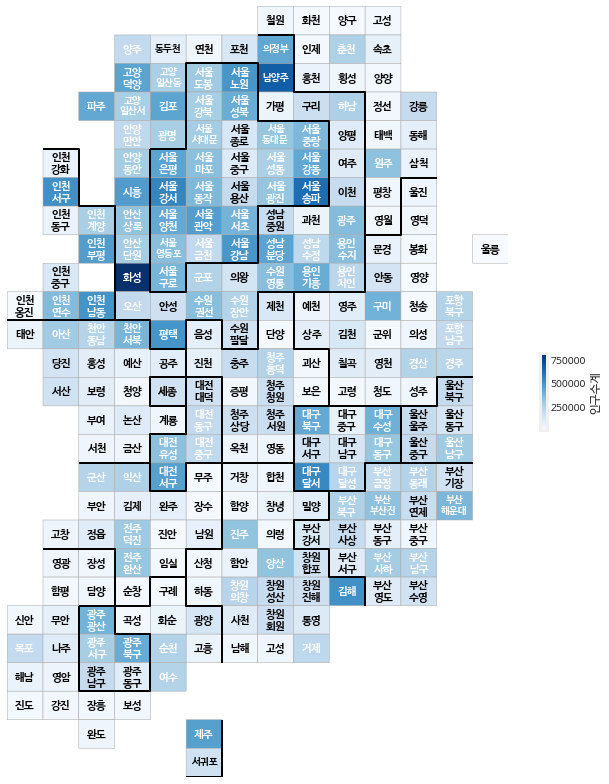

In [37]:
# 인구 현황 데이터
drawKorea('인구수계', pop, 'Blues')

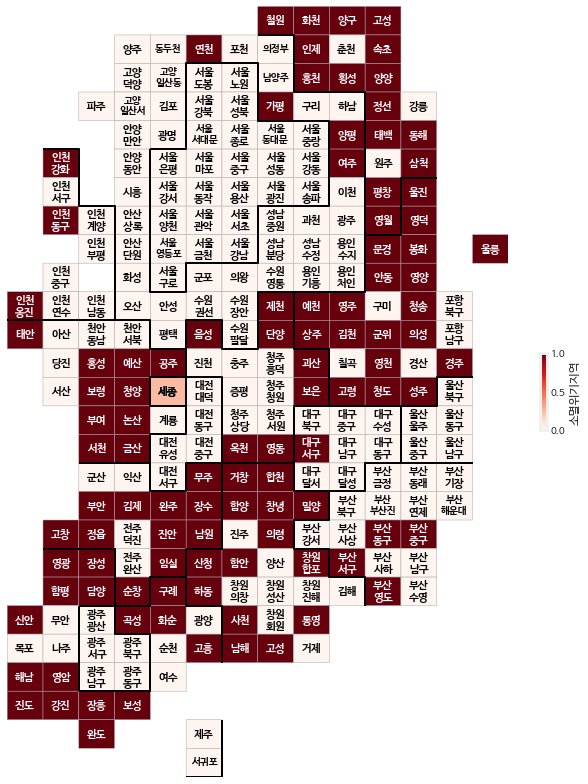

In [38]:
# 소멸 위기 지역 표현
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

- 강원도, 전남, 충남 지역이 위험 하다...

## 6) 인구현황에서 여성 인구 비율 확인

In [39]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


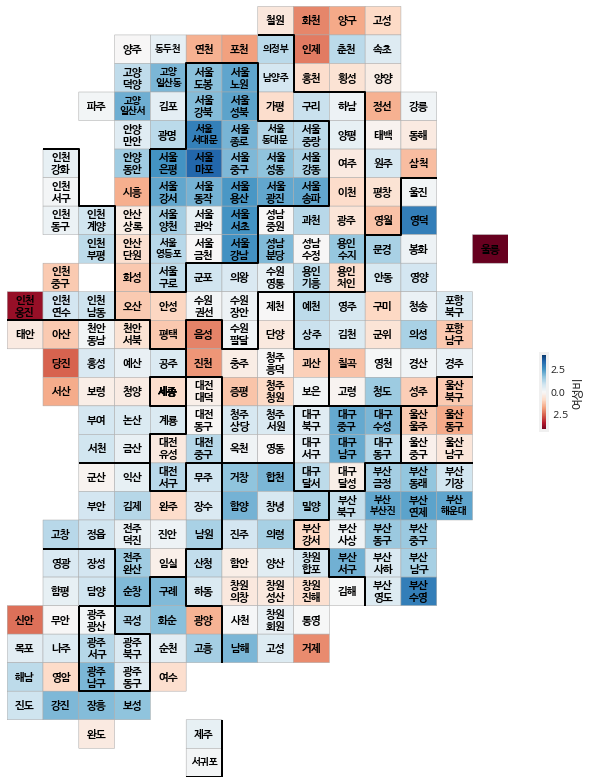

In [40]:
pop['여성비'] = (pop['인구수여자']/pop['인구수계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


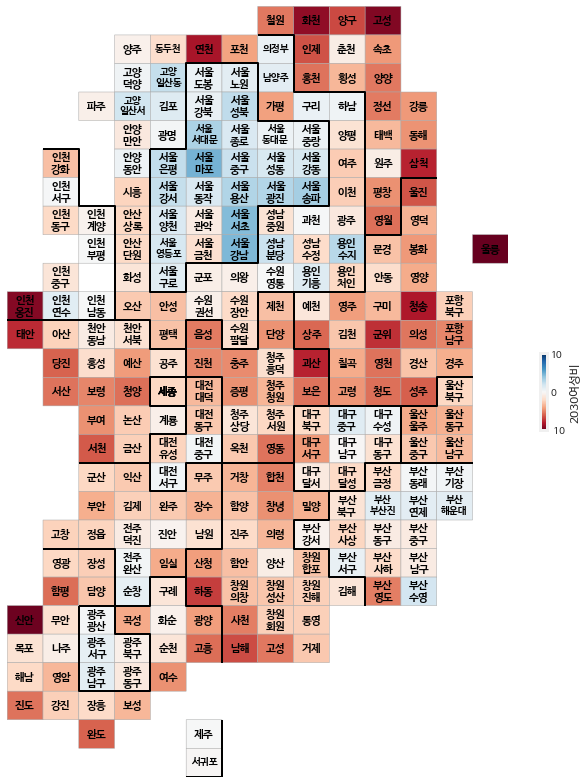

In [41]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

## 7) Folium을 활용하여 시각화

In [42]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세계,20-39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,47748,21778,42683,207831,103602,104229,1.020453,0,3,11,0.150844,-4.389713
고성(강원),강원도,고성군,4214,1710,7344,24044,12224,11820,0.465686,1,0,10,-0.840126,-9.420978
동해,강원도,동해시,16287,7395,17100,84776,42703,42073,0.864912,1,4,11,-0.371567,-4.595690
삼척,강원도,삼척시,12818,5404,15431,62456,32057,30399,0.700408,1,5,11,-1.327334,-7.840537
속초,강원도,속초시,16302,7435,14955,77706,38420,39286,0.994316,1,1,10,0.557229,-4.392099


In [43]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
geo_path = '/content/drive/MyDrive/스터디/데이터 주무르기/data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수계'],
               columns = [pop_folium.index, pop_folium['인구수계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [45]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map.save('/content/drive/MyDrive/스터디/데이터 주무르기/data/소멸위기지역.html')

In [46]:
draw_korea.to_csv("/content/drive/MyDrive/스터디/데이터 주무르기/data/05. draw_korea.csv", encoding='utf-8', sep=',')